In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd drive/MyDrive/{"Volatility Exercise"}

In [ ]:
# Import necessary packages in this cell

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_datareader as web
from datetime import datetime


In [ ]:

# Define the tickers and the time period
tickers = ['MSFT', 'AAPL', 'KO', 'GE']
start_date = '2000-01-01'
end_date = '2020-06-08'

# Loop through each ticker and get the closing price data
stock_data = {}
for ticker in tickers:
    stock_data[ticker] = web.data.DataReader(ticker, 'stooq', start_date, end_date)

#dictionary to  DataFrame
datapd = pd.DataFrame({ticker: data['Close'] for ticker, data in stock_data.items()})

# DataFrame to a NumPy array and printing the column labels and data dimensions
data = datapd.to_numpy()
print('Column Labels:', datapd.columns)
print('Data dimensions:', datapd.shape)

print(data[:5])

Column Labels: Index(['MSFT', 'AAPL', 'KO', 'GE'], dtype='object')
Data dimensions: (5140, 4)
[[ 41.0875     0.851702  19.4546   304.414   ]
 [ 39.7047     0.780021  19.4752   292.155   ]
 [ 40.1206     0.791386  19.6445   291.357   ]
 [ 38.7774     0.722995  19.6689   295.573   ]
 [ 39.2808     0.757589  20.9628   307.104   ]]


In [ ]:

# define the window size S
S = 20

# transform the data according to the formula provided
transformed_data = np.zeros_like(data)  # Initialize a new array to store transformed data

for i in range(data.shape[1]):
    for t in range(data.shape[0]):
        # Calculate the windowed mean for the current position . Using max in order to keep a bound at 0 in case t<20 . up until t+1 to include the current price in the calculation
        windowed_mean = np.mean(data[max(0, t - S):t+1, i])
        # apply the transformation to the current value
        transformed_data[t, i] = data[t, i] - (1 / min(S, t+1)) * windowed_mean

print('Transformed data shape:', transformed_data.shape)
print(transformed_data[:5])


Transformed data shape: (5140, 4)
[[  0.           0.           0.           0.        ]
 [ 19.50665      0.37209025   9.74275    143.01275   ]
 [ 26.68584444   0.52215167  13.13624444 192.69855556]
 [ 28.7967625    0.5263635   14.7787     221.6043125 ]
 [ 31.32196      0.60144128  16.99456    247.47988   ]]


In [ ]:
for i, column_label in enumerate(datapd.columns):
    column_std = np.std(transformed_data[:, i])
    print(f'Standard deviation of {column_label}: {column_std:.4f}')


Standard deviation of MSFT: 32.2761
Standard deviation of AAPL: 16.6912
Standard deviation of KO: 9.3627
Standard deviation of GE: nan


In [ ]:
ge = transformed_data[:, tickers.index('GE')]
print("Number of NaN values in GE column:", np.isnan(ge).sum())

Number of NaN values in GE column: 43


In [ ]:
ge = np.nan_to_num(ge, nan=np.nanmean(ge))
ge_std = np.std(ge)
print(f'std  of GE: {ge_std}')
# fill with mean
transformed_data[:,3]=ge



std  of GE: 60.532454439264974


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from tqdm.auto import tqdm
import matplotlib.pyplot as plt


Epochs:   0%|          | 0/150 [00:00<?, ?it/s]

Batches:   0%|          | 0/86 [00:00<?, ?it/s]

Batches:   0%|          | 0/86 [00:00<?, ?it/s]

Batches:   0%|          | 0/86 [00:00<?, ?it/s]

Batches:   0%|          | 0/86 [00:00<?, ?it/s]

Batches:   0%|          | 0/86 [00:00<?, ?it/s]

Batches:   0%|          | 0/86 [00:00<?, ?it/s]

Batches:   0%|          | 0/86 [00:00<?, ?it/s]

Batches:   0%|          | 0/86 [00:00<?, ?it/s]

Batches:   0%|          | 0/86 [00:00<?, ?it/s]

Batches:   0%|          | 0/86 [00:00<?, ?it/s]

Epoch 10, Loss: -0.14445481980544364


Batches:   0%|          | 0/86 [00:00<?, ?it/s]

Batches:   0%|          | 0/86 [00:00<?, ?it/s]

Batches:   0%|          | 0/86 [00:00<?, ?it/s]

Batches:   0%|          | 0/86 [00:00<?, ?it/s]

Batches:   0%|          | 0/86 [00:00<?, ?it/s]

Batches:   0%|          | 0/86 [00:00<?, ?it/s]

Batches:   0%|          | 0/86 [00:00<?, ?it/s]

Batches:   0%|          | 0/86 [00:00<?, ?it/s]

Batches:   0%|          | 0/86 [00:00<?, ?it/s]

Batches:   0%|          | 0/86 [00:00<?, ?it/s]

Epoch 20, Loss: 2.72510116322096


Batches:   0%|          | 0/86 [00:00<?, ?it/s]

Batches:   0%|          | 0/86 [00:00<?, ?it/s]

Batches:   0%|          | 0/86 [00:00<?, ?it/s]

Batches:   0%|          | 0/86 [00:00<?, ?it/s]

Batches:   0%|          | 0/86 [00:00<?, ?it/s]

Batches:   0%|          | 0/86 [00:00<?, ?it/s]

Batches:   0%|          | 0/86 [00:00<?, ?it/s]

Batches:   0%|          | 0/86 [00:00<?, ?it/s]

Batches:   0%|          | 0/86 [00:00<?, ?it/s]

Batches:   0%|          | 0/86 [00:00<?, ?it/s]

Epoch 30, Loss: 2.553405696569487


Batches:   0%|          | 0/86 [00:00<?, ?it/s]

Batches:   0%|          | 0/86 [00:00<?, ?it/s]

Batches:   0%|          | 0/86 [00:00<?, ?it/s]

Batches:   0%|          | 0/86 [00:00<?, ?it/s]

Batches:   0%|          | 0/86 [00:00<?, ?it/s]

Batches:   0%|          | 0/86 [00:00<?, ?it/s]

Batches:   0%|          | 0/86 [00:00<?, ?it/s]

Batches:   0%|          | 0/86 [00:00<?, ?it/s]

Batches:   0%|          | 0/86 [00:00<?, ?it/s]

Batches:   0%|          | 0/86 [00:00<?, ?it/s]

Epoch 40, Loss: 2.5024992463200593


Batches:   0%|          | 0/86 [00:00<?, ?it/s]

Batches:   0%|          | 0/86 [00:00<?, ?it/s]

Batches:   0%|          | 0/86 [00:00<?, ?it/s]

Batches:   0%|          | 0/86 [00:00<?, ?it/s]

Batches:   0%|          | 0/86 [00:00<?, ?it/s]

Batches:   0%|          | 0/86 [00:00<?, ?it/s]

Batches:   0%|          | 0/86 [00:00<?, ?it/s]

Batches:   0%|          | 0/86 [00:00<?, ?it/s]

Batches:   0%|          | 0/86 [00:00<?, ?it/s]

Batches:   0%|          | 0/86 [00:00<?, ?it/s]

Epoch 50, Loss: 2.491291595059772


Batches:   0%|          | 0/86 [00:00<?, ?it/s]

Batches:   0%|          | 0/86 [00:00<?, ?it/s]

Batches:   0%|          | 0/86 [00:00<?, ?it/s]

Batches:   0%|          | 0/86 [00:00<?, ?it/s]

Batches:   0%|          | 0/86 [00:00<?, ?it/s]

Batches:   0%|          | 0/86 [00:00<?, ?it/s]

Batches:   0%|          | 0/86 [00:00<?, ?it/s]

Batches:   0%|          | 0/86 [00:00<?, ?it/s]

Batches:   0%|          | 0/86 [00:00<?, ?it/s]

Batches:   0%|          | 0/86 [00:00<?, ?it/s]

Epoch 60, Loss: 2.4892256190610484


Batches:   0%|          | 0/86 [00:00<?, ?it/s]

Batches:   0%|          | 0/86 [00:00<?, ?it/s]

Batches:   0%|          | 0/86 [00:00<?, ?it/s]

Batches:   0%|          | 0/86 [00:00<?, ?it/s]

Batches:   0%|          | 0/86 [00:00<?, ?it/s]

Batches:   0%|          | 0/86 [00:00<?, ?it/s]

Batches:   0%|          | 0/86 [00:00<?, ?it/s]

Batches:   0%|          | 0/86 [00:00<?, ?it/s]

Batches:   0%|          | 0/86 [00:00<?, ?it/s]

Batches:   0%|          | 0/86 [00:00<?, ?it/s]

Epoch 70, Loss: 2.48889913254006


Batches:   0%|          | 0/86 [00:00<?, ?it/s]

Batches:   0%|          | 0/86 [00:00<?, ?it/s]

Batches:   0%|          | 0/86 [00:00<?, ?it/s]

Batches:   0%|          | 0/86 [00:00<?, ?it/s]

Batches:   0%|          | 0/86 [00:00<?, ?it/s]

Batches:   0%|          | 0/86 [00:00<?, ?it/s]

Batches:   0%|          | 0/86 [00:00<?, ?it/s]

Batches:   0%|          | 0/86 [00:00<?, ?it/s]

Batches:   0%|          | 0/86 [00:00<?, ?it/s]

Batches:   0%|          | 0/86 [00:00<?, ?it/s]

Epoch 80, Loss: 2.488831191561943


Batches:   0%|          | 0/86 [00:00<?, ?it/s]

Batches:   0%|          | 0/86 [00:00<?, ?it/s]

Batches:   0%|          | 0/86 [00:00<?, ?it/s]

Batches:   0%|          | 0/86 [00:00<?, ?it/s]

Batches:   0%|          | 0/86 [00:00<?, ?it/s]

Batches:   0%|          | 0/86 [00:00<?, ?it/s]

Batches:   0%|          | 0/86 [00:00<?, ?it/s]

Batches:   0%|          | 0/86 [00:00<?, ?it/s]

Batches:   0%|          | 0/86 [00:00<?, ?it/s]

Batches:   0%|          | 0/86 [00:00<?, ?it/s]

Epoch 90, Loss: 2.488724703012511


Batches:   0%|          | 0/86 [00:00<?, ?it/s]

Batches:   0%|          | 0/86 [00:00<?, ?it/s]

Batches:   0%|          | 0/86 [00:00<?, ?it/s]

Batches:   0%|          | 0/86 [00:00<?, ?it/s]

Batches:   0%|          | 0/86 [00:00<?, ?it/s]

Batches:   0%|          | 0/86 [00:00<?, ?it/s]

Batches:   0%|          | 0/86 [00:00<?, ?it/s]

Batches:   0%|          | 0/86 [00:00<?, ?it/s]

Batches:   0%|          | 0/86 [00:00<?, ?it/s]

Batches:   0%|          | 0/86 [00:00<?, ?it/s]

Epoch 100, Loss: 2.4885822991992153


Batches:   0%|          | 0/86 [00:00<?, ?it/s]

Batches:   0%|          | 0/86 [00:00<?, ?it/s]

Batches:   0%|          | 0/86 [00:00<?, ?it/s]

Batches:   0%|          | 0/86 [00:00<?, ?it/s]

Batches:   0%|          | 0/86 [00:00<?, ?it/s]

Batches:   0%|          | 0/86 [00:00<?, ?it/s]

Batches:   0%|          | 0/86 [00:00<?, ?it/s]

Batches:   0%|          | 0/86 [00:00<?, ?it/s]

Batches:   0%|          | 0/86 [00:00<?, ?it/s]

Batches:   0%|          | 0/86 [00:00<?, ?it/s]

Epoch 110, Loss: 2.4883878937987394


Batches:   0%|          | 0/86 [00:00<?, ?it/s]

Batches:   0%|          | 0/86 [00:00<?, ?it/s]

Batches:   0%|          | 0/86 [00:00<?, ?it/s]

Batches:   0%|          | 0/86 [00:00<?, ?it/s]

Batches:   0%|          | 0/86 [00:00<?, ?it/s]

Batches:   0%|          | 0/86 [00:00<?, ?it/s]

Batches:   0%|          | 0/86 [00:00<?, ?it/s]

Batches:   0%|          | 0/86 [00:00<?, ?it/s]

Batches:   0%|          | 0/86 [00:00<?, ?it/s]

Batches:   0%|          | 0/86 [00:00<?, ?it/s]

Epoch 120, Loss: 2.4881413953248845


Batches:   0%|          | 0/86 [00:00<?, ?it/s]

Batches:   0%|          | 0/86 [00:00<?, ?it/s]

Batches:   0%|          | 0/86 [00:00<?, ?it/s]

Batches:   0%|          | 0/86 [00:00<?, ?it/s]

Batches:   0%|          | 0/86 [00:00<?, ?it/s]

Batches:   0%|          | 0/86 [00:00<?, ?it/s]

Batches:   0%|          | 0/86 [00:00<?, ?it/s]

Batches:   0%|          | 0/86 [00:00<?, ?it/s]

Batches:   0%|          | 0/86 [00:00<?, ?it/s]

Batches:   0%|          | 0/86 [00:00<?, ?it/s]

Epoch 130, Loss: 2.487824506537859


Batches:   0%|          | 0/86 [00:00<?, ?it/s]

Batches:   0%|          | 0/86 [00:00<?, ?it/s]

Batches:   0%|          | 0/86 [00:00<?, ?it/s]

Batches:   0%|          | 0/86 [00:00<?, ?it/s]

Batches:   0%|          | 0/86 [00:00<?, ?it/s]

Batches:   0%|          | 0/86 [00:00<?, ?it/s]

Batches:   0%|          | 0/86 [00:00<?, ?it/s]

Batches:   0%|          | 0/86 [00:00<?, ?it/s]

Batches:   0%|          | 0/86 [00:00<?, ?it/s]

Batches:   0%|          | 0/86 [00:00<?, ?it/s]

Epoch 140, Loss: 2.4874565435010334


Batches:   0%|          | 0/86 [00:00<?, ?it/s]

Batches:   0%|          | 0/86 [00:00<?, ?it/s]

Batches:   0%|          | 0/86 [00:00<?, ?it/s]

Batches:   0%|          | 0/86 [00:00<?, ?it/s]

Batches:   0%|          | 0/86 [00:00<?, ?it/s]

Batches:   0%|          | 0/86 [00:00<?, ?it/s]

Batches:   0%|          | 0/86 [00:00<?, ?it/s]

Batches:   0%|          | 0/86 [00:00<?, ?it/s]

Batches:   0%|          | 0/86 [00:00<?, ?it/s]

Batches:   0%|          | 0/86 [00:00<?, ?it/s]

Epoch 150, Loss: 2.487035948176717


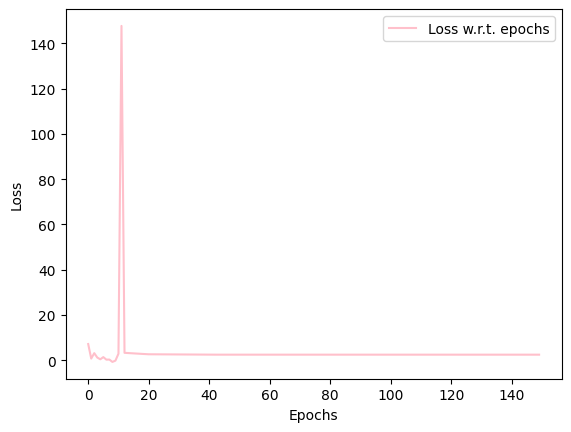

In [ ]:

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


# Convert to PyTorch tensors
transformed_data_tensor = torch.tensor(transformed_data, dtype=torch.float32)
log_data_tensor = torch.log(transformed_data_tensor + 1e-6)  # to prevent taking log of zero

# Dataset and DataLoader creation
inputs = log_data_tensor[:-1]  # Log prices excluding the last day
targets = log_data_tensor[1:]  # Log prices excluding the first day

dataset = TensorDataset(inputs, targets)
dataloader = DataLoader(dataset, batch_size=60, shuffle=False)  # No shuffle for time series data

class NeuralNetwork(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(NeuralNetwork, self).__init__()
        self.phi1 = nn.Linear(input_dim, hidden_dim)
        self.phi2 = nn.Linear(hidden_dim, output_dim)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.phi1(x))
        return self.phi2(x)

d = transformed_data.shape[1]  # Number of features (stocks)
H = 64
b_phi = NeuralNetwork(d, H, d).to(device)
omega_theta = NeuralNetwork(d, H, d * d).to(device)

# move to GPU
b_phi = b_phi.to(device)
omega_theta = omega_theta.to(device)

# loss function
def nll_loss(preds, targets, omega_output):
    # Transform omega_output to covariance matrix
    L = omega_output.view(-1, d, d)
    L = torch.tril(L)  # Lower triangular, important for Cholesky decomposition
    sigma = L @ L.transpose(-1, -2) + torch.eye(d, device=device) * 1e-6  # Ensure positive definiteness
    precision = torch.inverse(sigma)  # precision matrix is the inverse of sigma
    diff = preds - targets
    return 0.5 * torch.mean(torch.logdet(sigma) + (diff.unsqueeze(-1).transpose(-1, -2) @ precision @ diff.unsqueeze(-1)).squeeze())

# Optimizers
optimizer_b_phi = optim.Adam(b_phi.parameters(), lr=0.001)
optimizer_omega_theta = optim.Adam(omega_theta.parameters(), lr=0.001)

# learning rate schedulers
scheduler_b_phi = optim.lr_scheduler.ReduceLROnPlateau(optimizer_b_phi, 'min')
scheduler_omega_theta = optim.lr_scheduler.ReduceLROnPlateau(optimizer_omega_theta, 'min')

# trianing function
def train(num_epochs):
    loss_history = []
    for epoch in tqdm(range(num_epochs), desc='Epochs'):
        total_loss = 0
        for data, target in tqdm(dataloader, desc='Batches', leave=False):
            data, target = data.to(device), target.to(device)
            optimizer_b_phi.zero_grad()
            optimizer_omega_theta.zero_grad()

            b_phi_output = b_phi(data)
            omega_output = omega_theta(data)

            loss = nll_loss(b_phi_output, target, omega_output)
            loss.backward()
            optimizer_b_phi.step()
            optimizer_omega_theta.step()
            total_loss += loss.item()

        scheduler_b_phi.step(total_loss)
        scheduler_omega_theta.step(total_loss)
        loss_history.append(total_loss / len(dataloader))

        if (epoch + 1) % 10 == 0:
            tqdm.write(f'Epoch {epoch + 1}, Loss: {total_loss / len(dataloader)}')

    plt.plot(loss_history, label='Loss w.r.t. epochs',color='pink')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    return b_phi, omega_theta

# Run training
b_phi_trained, omega_theta_trained = train(num_epochs=100)




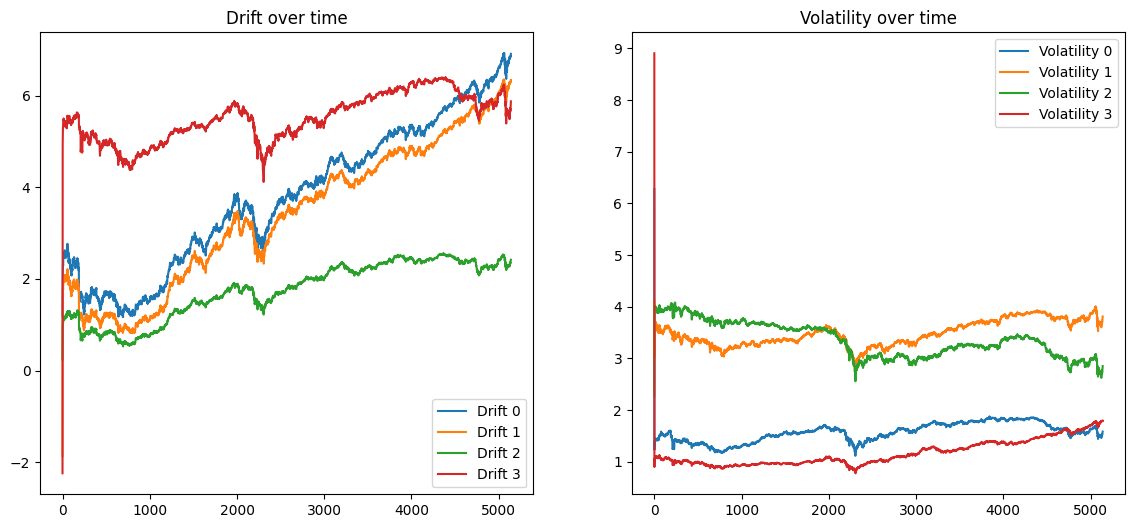

In [ ]:
# Plotting the drift and volatility
def plot_drift_and_volatility(b_phi_trained, omega_theta_trained):
    with torch.no_grad():  # No need to track gradients for these operations
        # Assuming we want to plot for the entire dataset
        b_phi_output = b_phi_trained(log_data_tensor.to(device)).cpu().numpy()
        omega_output = omega_theta_trained(log_data_tensor.to(device)).cpu().view(-1, d, d)
        # Calculate the covariance matrix and its diagonal (the variance)
        L = torch.tril(omega_output)
        sigma = L @ L.transpose(-1, -2)
        variances = torch.diagonal(sigma, dim1=-2, dim2=-1)

        # Plot drifts
        plt.figure(figsize=(14, 6))
        plt.subplot(1, 2, 1)
        for i in range(d):
            plt.plot(b_phi_output[:, i], label=f'Drift {i}')
        plt.title('Drift over time')
        plt.legend()

        # Plot volatilities
        plt.subplot(1, 2, 2)
        for i in range(d):
            plt.plot(variances[:, i].sqrt(), label=f'Volatility {i}')
        plt.title('Volatility over time')
        plt.legend()
        plt.show()

# Run plotting function
plot_drift_and_volatility(b_phi_trained, omega_theta_trained)

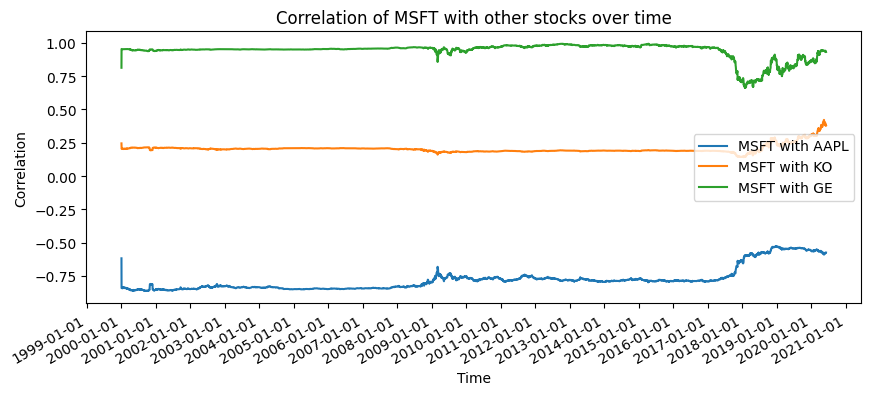

In [ ]:
import matplotlib.dates as mdates

def plot_correlation(omega_theta_trained, transformed_data_tensor, column_labels, dates):
    with torch.no_grad():  # No need to track gradients for these operations
        # Forward pass through omega_theta network
        omega_output = omega_theta_trained(transformed_data_tensor[:-1].to(device)).view(-1, d, d)

        # Calculate covariance matrix
        L = torch.tril(omega_output)
        sigma = L @ L.transpose(-1, -2)

        # Compute std's and correlation matrix
        std_devs = torch.sqrt(torch.diagonal(sigma, dim1=-2, dim2=-1))
        correlation_matrix = sigma / (std_devs.unsqueeze(-1) * std_devs.unsqueeze(-2))

        # Plot correlations for MSFT
        plt.figure(figsize=(10, 4))
        for i, label in enumerate(column_labels):
            if label != 'MSFT':
                plt.plot(dates, correlation_matrix[:, 0, i].cpu(), label=f'MSFT with {label}')

        plt.title('Correlation of MSFT with other stocks over time')
        plt.xlabel('Time')
        plt.ylabel('Correlation')
        plt.legend()
        plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
        plt.gca().xaxis.set_major_locator(mdates.YearLocator())
        plt.gcf().autofmt_xdate()
        plt.show()

plot_correlation(omega_theta_trained, transformed_data_tensor, ['MSFT', 'AAPL', 'KO', 'GE'], datapd.index[1:])# because the first value we dropped during logarithmization
